# Calcul de la dérivée d'une fonction en Python

La *dérivation numérique* d'une fonction $f$ consiste à estimer la valeur de la dérivée $f'$ en certains points $x_i$, en calculant la pente de la tangente à la courbe en $x_i$.

Nous supposons connues les valeurs de la fonction $f$ en $N$ points de coordonnées $(x_i, y_i)$ avec $y_i = f(x_i)$.

Une approximation numérique de la dérivée de $f$ en $x_i$ est obtenue depuis la pente de la corde reliant les points $(x_{i-1}, y_{i-1})$ et $(x_{i+1}, y_{i+1})$. La figure ci-dessous illustre cette approche.

![Principe de la dérivation numérique](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Derivation_numerique.svg/268px-Derivation_numerique.svg.png)

Cette approximation est assez précise si l'intervalle $[x_{i-1}; x_{i+1}]$ est petit (voir la [page Wikipédia](https://fr.wikipedia.org/wiki/D%C3%A9riv%C3%A9e#D%C3%A9rivation_num%C3%A9rique) pour la justification mathématique de cette approche).

Dans le code ci-dessous:
- `N` est le nombre de points de discrétisation de $f$
- `xmin` et `xmax` décrivent l'intervalle des abscisses.
- `x` est un ensemble de `N` points uniformellement répartis dans l'intervalle `[xmin; xmax]`.
- `y` est le tableau des valeurs de $f$ pour chaque point de `x`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 101
xmin = 0
xmax = 10
x = np.linspace(xmin, xmax, N)    # tableau des abscisses
y = np.sin(x)                     # tableau des ordonnées: f(x)

Le calcul de la dérivée consiste à appliquer la technique ci-dessus aux points $x_i$ tels que $i \in [1;N-2]$. Pour ces points, on calcule:

$f'(x_i) = \frac{y_{i+1} - y_{i-1}}{x_{i+1} - x_{i-1}}$

On obtient ainsi une discrétisation de $f'$.

Dans le code ci-dessous:
- `xd` est le tableau des points $x_i$ à l'exclusion du premier et du dernier
- `yd` est le tableau des valeurs estimées de $f'$ (la dérivée de $f$) pour chaque point de `xd`

La boucle calcule les valeurs de `yd` en appliquant le principe ci-dessus.

In [2]:
xd = x[1:-1]
yd = np.zeros(N-2)

for i in range(1, N-1):
    if x[i+1] - x[i-1] != 0.0:
        yd[i-1] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    elif y[i+1] - y[i-1] >= 0:
        yd[i-1] = float('inf')
    else:
        yd[i-1] = float('-inf')

On peut maintenant tracer les graphes de $f$ et $f'$ en utilisant les tableaux `x` et `y` d'une part, et `xd` et `yd` d'autre part.

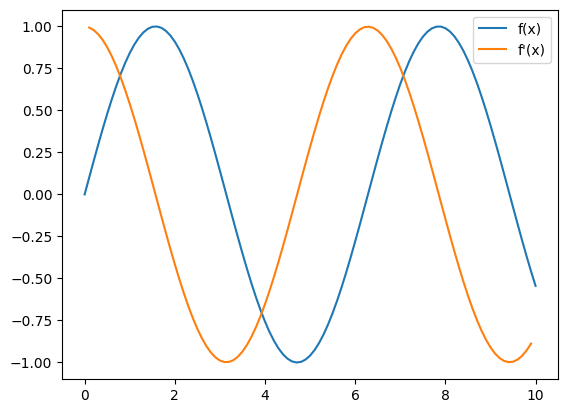

In [3]:
plt.plot(x, y, label="f(x)")
plt.plot(xd, yd, label="f'(x)")

plt.legend()
plt.show() 